**Making the notebook flexible between different environments (google cloab and Kaggle)**

In [1]:
import os
import sys

# Detect the environment
def detect_environment():
    if 'google.colab' in sys.modules:
        return "Google Colab"
    elif os.path.exists('/kaggle/working'):
        return "Kaggle"
    else:
        return "Unknown"

# Adapt path based on environment
def adapt_path(path):
    env = detect_environment()

    if env == "Google Colab":
        base_path = "/content"
    elif env == "Kaggle":
        base_path = "/kaggle/working"
    else:
        raise EnvironmentError("Unsupported environment")

    # If the path starts with the base path of the other environment, remove it
    if env == "Google Colab" and path.startswith("/kaggle/working"):
        path = path.replace("/kaggle/working", "/content", 1)
    elif env == "Kaggle" and path.startswith("/content"):
        path = path.replace("/content", "/kaggle/working", 1)

    # If the path already starts with the base path of the current environment, return the path as is
    if path.startswith(base_path):
        return path
    else:
        # If the path is relative, make it absolute by joining with the base path
        return os.path.join(base_path, path.lstrip("/"))

# Example usage
base_path = adapt_path("")
print(base_path)

/content/


**Delete all Folders that save before**

In [2]:
import shutil
import os

# Path to the main directory where files are stored
root_dir = "/content/"

# Remove all files and folders in the root directory except system folders
for item in os.listdir(root_dir):
    item_path = os.path.join(root_dir, item)
    if item not in ["sample_data"]:  # Exclude system default folders if needed
        try:
            if os.path.isfile(item_path) or os.path.islink(item_path):
                os.unlink(item_path)  # Remove files and links
            elif os.path.isdir(item_path):
                shutil.rmtree(item_path)  # Remove directories
        except Exception as e:
            print(f"Failed to delete {item}: {e}")

print("All files and folders deleted!")

All files and folders deleted!


**Cleaning up TensorFlow resources to free memory**

In [3]:
import tensorflow as tf
import gc

def clear_tf_memory():
    """Clears TensorFlow-related memory while preserving imports and functions"""
    try:
        # Clear the Keras session (removes models, layers, etc.)
        tf.keras.backend.clear_session()

        # Collect TensorFlow objects that are still in scope
        for var in list(globals().keys()):
            if var.startswith('_'):
                continue
            obj = globals()[var]
            if isinstance(obj, (tf.keras.Model, tf.keras.layers.Layer,
                               tf.Variable, tf.Tensor, tf.keras.optimizers.Optimizer)):
                del globals()[var]

        # Clear any remaining TensorFlow graphs
        tf.compat.v1.reset_default_graph()

        # Force garbage collection
        gc.collect()

        #print("Successfully cleared TensorFlow memory while preserving other objects")

    except Exception as e:
        print(f"Error during memory clearing: {str(e)}")

# Usage:
clear_tf_memory()
clear_tf_memory()
clear_tf_memory()
clear_tf_memory()

**Read Train Part of Dataset**

In [4]:
import gdown
import zipfile
import os

def download_and_extract(file_id, zip_file_name, extract_dir):
    try:
        url = f"https://drive.google.com/uc?id={file_id}"
        print(f"Trying to download from: {url}")

        gdown.download(url, zip_file_name, quiet=True)

        if zipfile.is_zipfile(zip_file_name):
            with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
                zip_ref.extractall(extract_dir)
            print(f"File extracted successfully to '{extract_dir}'.")
            return True
        else:
            print("Downloaded file is not a valid ZIP.")
            return False
    except Exception:
        # Suppress gdown or zip-related errors
        return False
    finally:
        # Clean up corrupted file if it exists
        if os.path.exists(zip_file_name) and not zipfile.is_zipfile(zip_file_name):
            os.remove(zip_file_name)

# Primary and backup file IDs
primary_file_id = "1blLUjNlO29-x63tODIXy2IWf6cngAT0y"
backup_file_id = "1blLUjNlO29-x63tODIXy2IWf6cngAT0y"

# Download attempt
success = download_and_extract(primary_file_id, "ROCOv2-train.zip", "ROCOv2-train")

# Try backup if primary fails
if not success:
    print("Primary download failed. Attempting download from backup link...")
    success = download_and_extract(backup_file_id, "ROCOv2-train.zip", "ROCOv2-train")

if not success:
    print("Both primary and backup downloads failed.")


Trying to download from: https://drive.google.com/uc?id=1blLUjNlO29-x63tODIXy2IWf6cngAT0y
File extracted successfully to 'ROCOv2-train'.


**Read Test Part of Dataset**

In [5]:
import gdown
import zipfile
import os

def download_and_extract(file_id, zip_file_name, extract_dir):
    try:
        url = f"https://drive.google.com/uc?id={file_id}"
        print(f"Trying to download from: {url}")

        gdown.download(url, zip_file_name, quiet=True)

        if zipfile.is_zipfile(zip_file_name):
            with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
                zip_ref.extractall(extract_dir)
            print(f"File extracted successfully to '{extract_dir}'.")
            return True
        else:
            print("Downloaded file is not a valid ZIP.")
            return False
    except Exception:
        # Suppress gdown or zip-related errors
        return False
    finally:
        # Clean up corrupted file if it exists
        if os.path.exists(zip_file_name) and not zipfile.is_zipfile(zip_file_name):
            os.remove(zip_file_name)

# Primary and backup file IDs
primary_file_id = "16c_s7nNs2IRrLX3-AEh7i3Kh3dXaUZgf"
backup_file_id = "16c_s7nNs2IRrLX3-AEh7i3Kh3dXaUZgf"

# Download attempt
success = download_and_extract(primary_file_id, "ROCOv2-test.zip", "ROCOv2-test")

# Try backup if primary fails
if not success:
    print("Primary download failed. Attempting download from backup link...")
    success = download_and_extract(backup_file_id, "ROCOv2-test.zip", "ROCOv2-test")

if not success:
    print("Both primary and backup downloads failed.")

Trying to download from: https://drive.google.com/uc?id=16c_s7nNs2IRrLX3-AEh7i3Kh3dXaUZgf
File extracted successfully to 'ROCOv2-test'.


**MASKED AUTOENCODER**

Mounted at /content/drive
Using device: cuda
ViT-MAE Medical Image Reconstruction

1. Loading pre-trained ViT-MAE model...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/217 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/vit/feature_extraction_vit.py:30: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


config.json:   0%|          | 0.00/676 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/448M [00:00<?, ?B/s]

Pre-trained model loaded successfully!

2. Creating datasets...
Found 2000 images in /content/ROCOv2-train/train
Found 100 images in /content/ROCOv2-test/test

3. Evaluating pre-trained model on test samples...

=== Sample 1/5 ===
Image path: /content/ROCOv2-test/test/ROCOv2_2023_test_005724.jpg


<ipython-input-6-4292637938>:81: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  plt.imshow(torch.clip((image * imagenet_std + imagenet_mean) * 255, 0, 255).int())


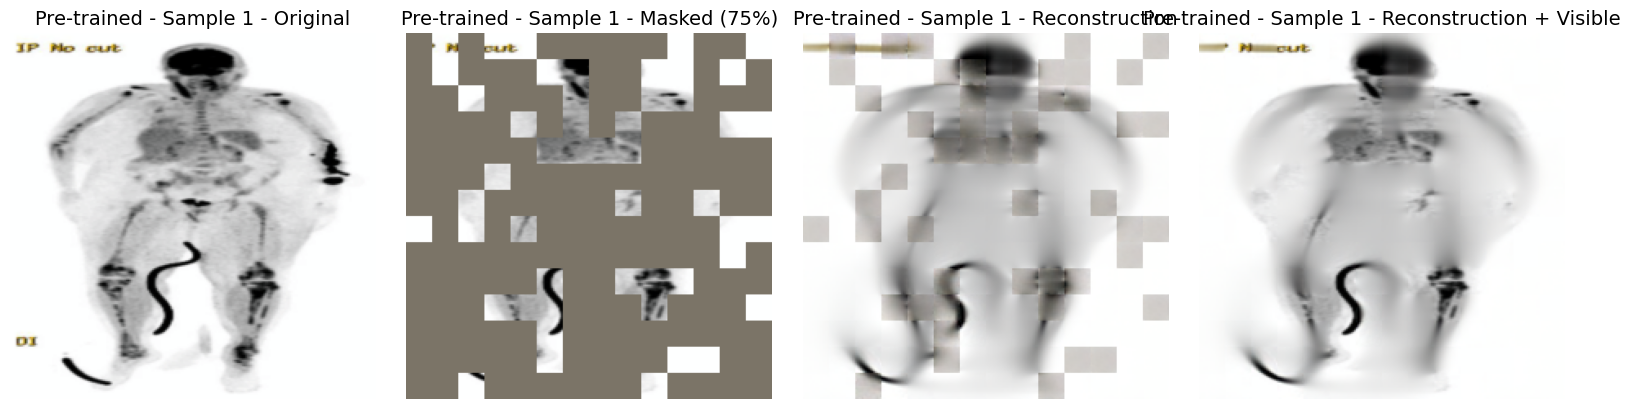


=== Sample 2/5 ===
Image path: /content/ROCOv2-test/test/ROCOv2_2023_test_009325.jpg


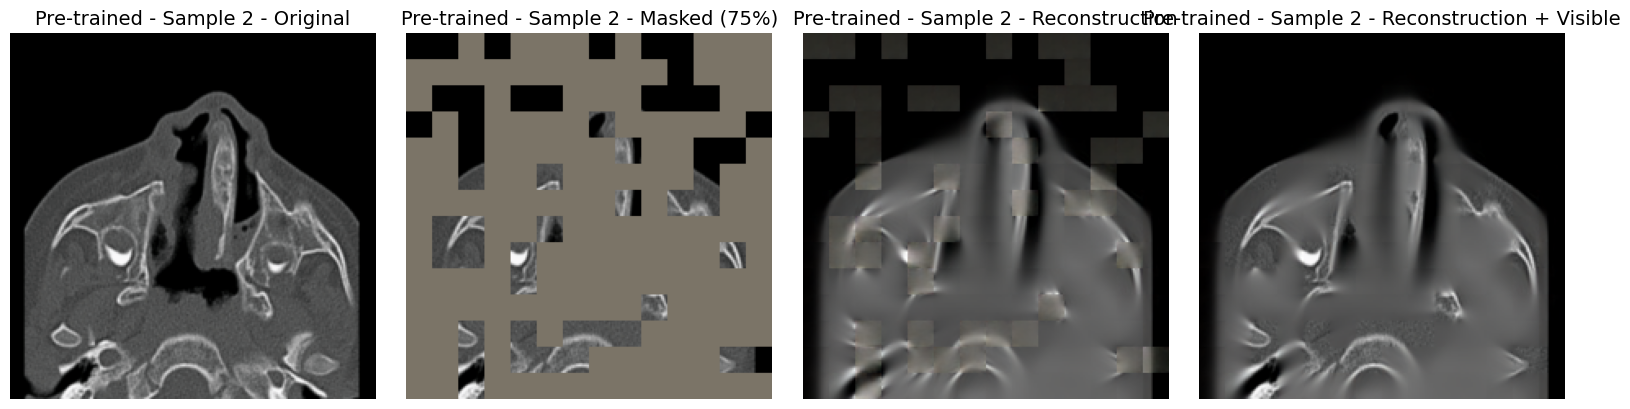


=== Sample 3/5 ===
Image path: /content/ROCOv2-test/test/ROCOv2_2023_test_008072.jpg


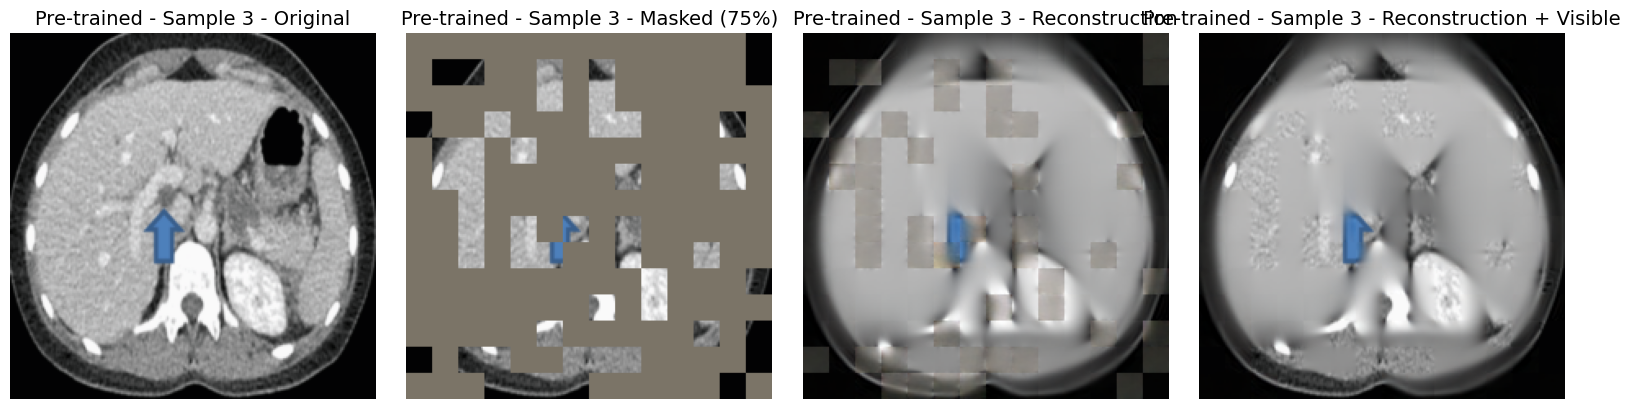


=== Sample 4/5 ===
Image path: /content/ROCOv2-test/test/ROCOv2_2023_test_008166.jpg


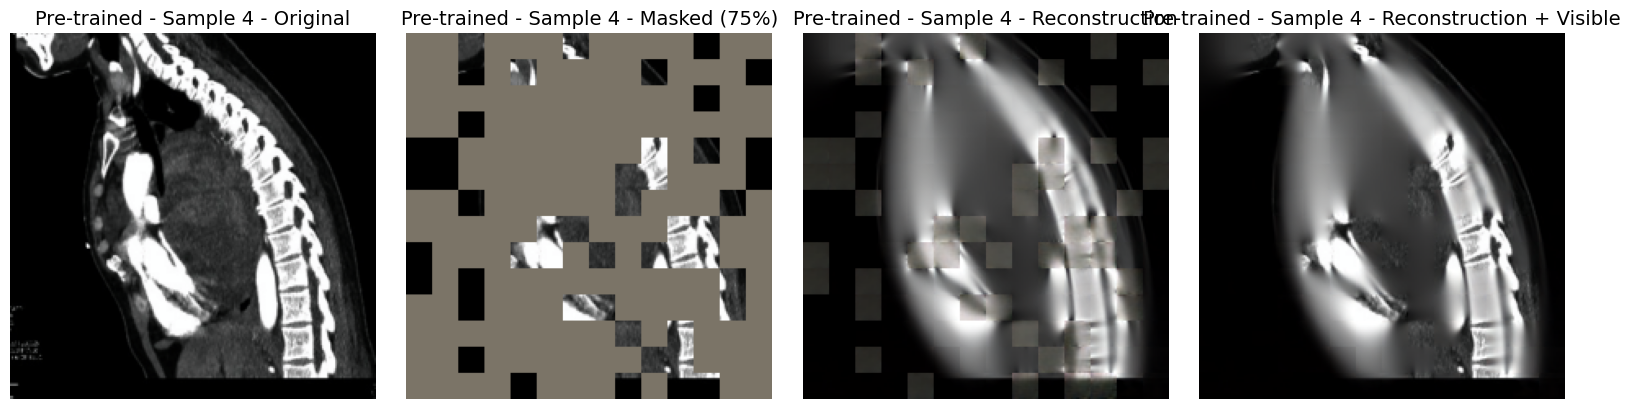


=== Sample 5/5 ===
Image path: /content/ROCOv2-test/test/ROCOv2_2023_test_008433.jpg


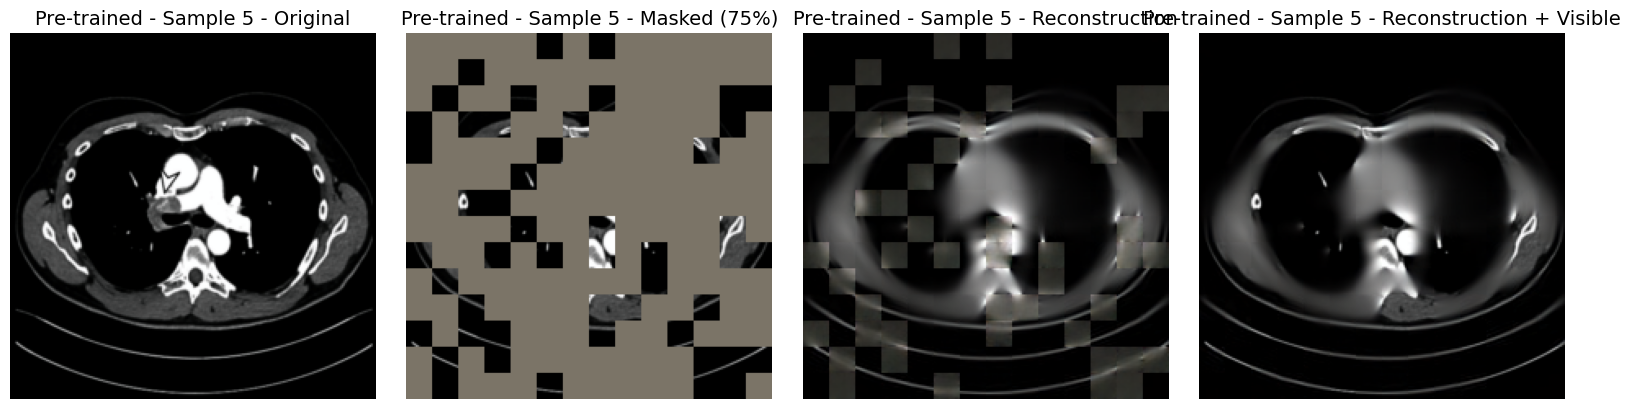


4. Fine-tuning model on medical images...
Starting fine-tuning...

Epoch 1/5


Training Epoch 1:  20%|██        | 101/500 [00:21<10:26,  1.57s/it, Loss=0.1737]


Checkpoint saved: /content/drive/MyDrive/vit_mae_medical/checkpoint_epoch_1_batch_100.pt


Training Epoch 1:  40%|████      | 201/500 [00:49<14:01,  2.81s/it, Loss=0.2622]


Checkpoint saved: /content/drive/MyDrive/vit_mae_medical/checkpoint_epoch_1_batch_200.pt


Training Epoch 1:  60%|██████    | 301/500 [01:19<09:22,  2.83s/it, Loss=0.2234]


Checkpoint saved: /content/drive/MyDrive/vit_mae_medical/checkpoint_epoch_1_batch_300.pt


Training Epoch 1:  80%|████████  | 401/500 [01:45<03:55,  2.38s/it, Loss=0.2228]


Checkpoint saved: /content/drive/MyDrive/vit_mae_medical/checkpoint_epoch_1_batch_400.pt


Training Epoch 1: 100%|██████████| 500/500 [02:08<00:00,  3.88it/s, Loss=0.2228]


Checkpoint saved: /content/drive/MyDrive/vit_mae_medical/checkpoint_epoch_1_batch_500.pt
Epoch 1 Average Loss: 0.2316


Model saved: /content/drive/MyDrive/vit_mae_medical/model_epoch_1.pt

Epoch 2/5


Training Epoch 2:  20%|██        | 100/500 [00:31<23:45,  3.56s/it, Loss=0.1542]


Checkpoint saved: /content/drive/MyDrive/vit_mae_medical/checkpoint_epoch_2_batch_100.pt


Training Epoch 2:  40%|████      | 201/500 [00:58<13:18,  2.67s/it, Loss=0.2626]


Checkpoint saved: /content/drive/MyDrive/vit_mae_medical/checkpoint_epoch_2_batch_200.pt


Training Epoch 2:  60%|██████    | 300/500 [01:30<16:08,  4.84s/it, Loss=0.1212]


Checkpoint saved: /content/drive/MyDrive/vit_mae_medical/checkpoint_epoch_2_batch_300.pt


Training Epoch 2:  80%|████████  | 400/500 [02:02<06:39,  3.99s/it, Loss=0.2305]


Checkpoint saved: /content/drive/MyDrive/vit_mae_medical/checkpoint_epoch_2_batch_400.pt


Training Epoch 2: 100%|██████████| 500/500 [02:30<00:00,  3.33it/s, Loss=0.2368]


Checkpoint saved: /content/drive/MyDrive/vit_mae_medical/checkpoint_epoch_2_batch_500.pt
Epoch 2 Average Loss: 0.2280


Model saved: /content/drive/MyDrive/vit_mae_medical/model_epoch_2.pt

Epoch 3/5


Training Epoch 3:  20%|██        | 100/500 [00:32<22:56,  3.44s/it, Loss=0.2820]


Checkpoint saved: /content/drive/MyDrive/vit_mae_medical/checkpoint_epoch_3_batch_100.pt


Training Epoch 3:  40%|████      | 200/500 [01:04<22:05,  4.42s/it, Loss=0.3033]


Checkpoint saved: /content/drive/MyDrive/vit_mae_medical/checkpoint_epoch_3_batch_200.pt


Training Epoch 3:  60%|██████    | 301/500 [01:30<06:07,  1.85s/it, Loss=0.1576]


Checkpoint saved: /content/drive/MyDrive/vit_mae_medical/checkpoint_epoch_3_batch_300.pt


Training Epoch 3:  80%|████████  | 400/500 [01:54<03:40,  2.20s/it, Loss=0.1668]


Checkpoint saved: /content/drive/MyDrive/vit_mae_medical/checkpoint_epoch_3_batch_400.pt


Training Epoch 3: 100%|██████████| 500/500 [02:20<00:00,  3.55it/s, Loss=0.3695]


Checkpoint saved: /content/drive/MyDrive/vit_mae_medical/checkpoint_epoch_3_batch_500.pt
Epoch 3 Average Loss: 0.2243


Model saved: /content/drive/MyDrive/vit_mae_medical/model_epoch_3.pt

Epoch 4/5


Training Epoch 4:  20%|██        | 100/500 [00:32<16:18,  2.45s/it, Loss=0.2379]


Checkpoint saved: /content/drive/MyDrive/vit_mae_medical/checkpoint_epoch_4_batch_100.pt


Training Epoch 4:  40%|████      | 200/500 [00:54<09:47,  1.96s/it, Loss=0.3819]


Checkpoint saved: /content/drive/MyDrive/vit_mae_medical/checkpoint_epoch_4_batch_200.pt


Training Epoch 4:  60%|██████    | 300/500 [01:25<13:06,  3.93s/it, Loss=0.2952]


Checkpoint saved: /content/drive/MyDrive/vit_mae_medical/checkpoint_epoch_4_batch_300.pt


Training Epoch 4:  80%|████████  | 400/500 [01:57<07:54,  4.75s/it, Loss=0.1320]


Checkpoint saved: /content/drive/MyDrive/vit_mae_medical/checkpoint_epoch_4_batch_400.pt


Training Epoch 4: 100%|██████████| 500/500 [02:27<00:00,  3.40it/s, Loss=0.2854]


Checkpoint saved: /content/drive/MyDrive/vit_mae_medical/checkpoint_epoch_4_batch_500.pt
Epoch 4 Average Loss: 0.2228


Model saved: /content/drive/MyDrive/vit_mae_medical/model_epoch_4.pt

Epoch 5/5


Training Epoch 5:  20%|██        | 100/500 [00:34<28:11,  4.23s/it, Loss=0.1773]


Checkpoint saved: /content/drive/MyDrive/vit_mae_medical/checkpoint_epoch_5_batch_100.pt


Training Epoch 5:  40%|████      | 200/500 [01:07<24:04,  4.81s/it, Loss=0.2915]


Checkpoint saved: /content/drive/MyDrive/vit_mae_medical/checkpoint_epoch_5_batch_200.pt


Training Epoch 5:  60%|██████    | 300/500 [01:36<12:21,  3.71s/it, Loss=0.2309]


Checkpoint saved: /content/drive/MyDrive/vit_mae_medical/checkpoint_epoch_5_batch_300.pt


Training Epoch 5:  80%|████████  | 400/500 [02:07<06:28,  3.88s/it, Loss=0.1264]


Checkpoint saved: /content/drive/MyDrive/vit_mae_medical/checkpoint_epoch_5_batch_400.pt


Training Epoch 5: 100%|██████████| 500/500 [02:37<00:00,  3.18it/s, Loss=0.2908]


Checkpoint saved: /content/drive/MyDrive/vit_mae_medical/checkpoint_epoch_5_batch_500.pt
Epoch 5 Average Loss: 0.2209


Model saved: /content/drive/MyDrive/vit_mae_medical/model_epoch_5.pt

Final model saved: /content/drive/MyDrive/vit_mae_medical/final_model.pt


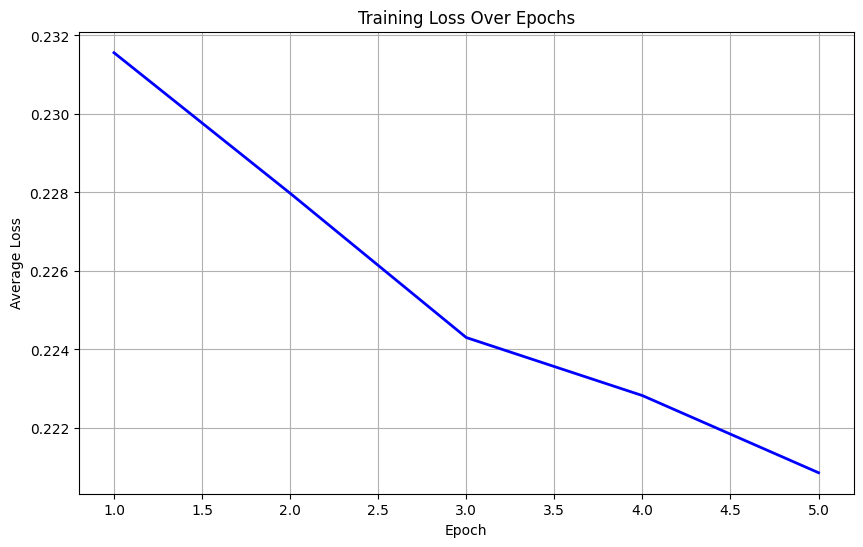


5. Loading and evaluating fine-tuned model...
Model loaded from: /content/drive/MyDrive/vit_mae_medical/final_model.pt

=== Sample 1/5 ===
Image path: /content/ROCOv2-test/test/ROCOv2_2023_test_004453.jpg


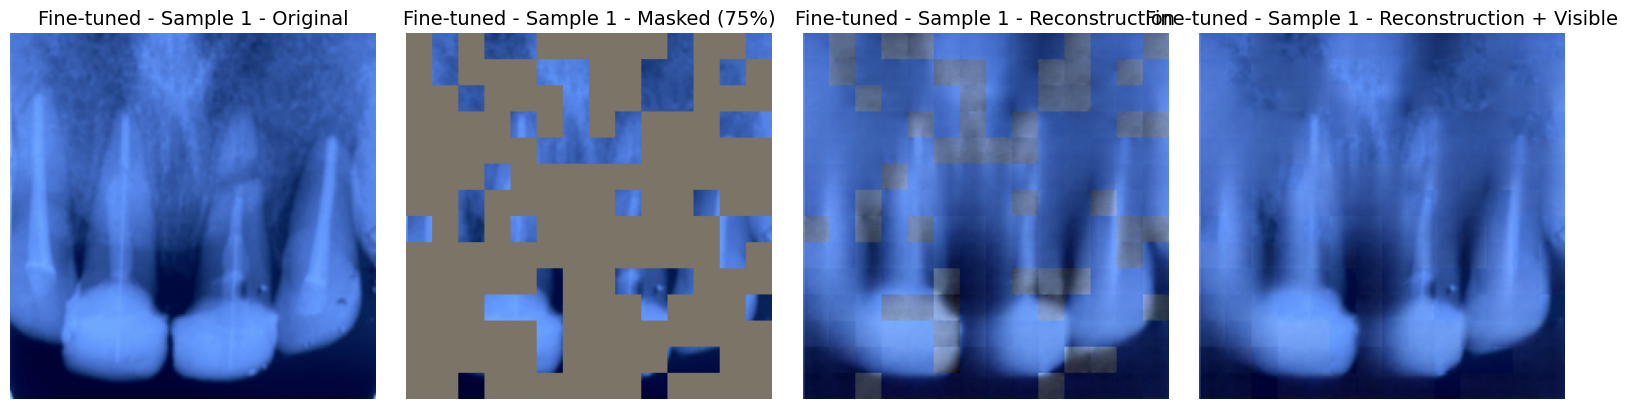


=== Sample 2/5 ===
Image path: /content/ROCOv2-test/test/ROCOv2_2023_test_003534.jpg


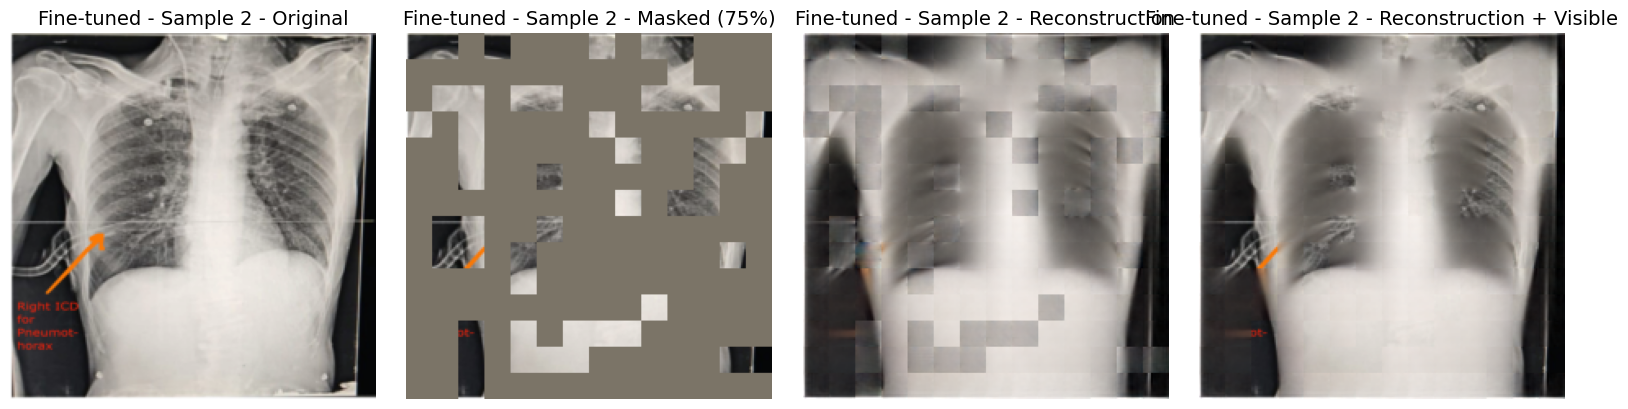


=== Sample 3/5 ===
Image path: /content/ROCOv2-test/test/ROCOv2_2023_test_003288.jpg


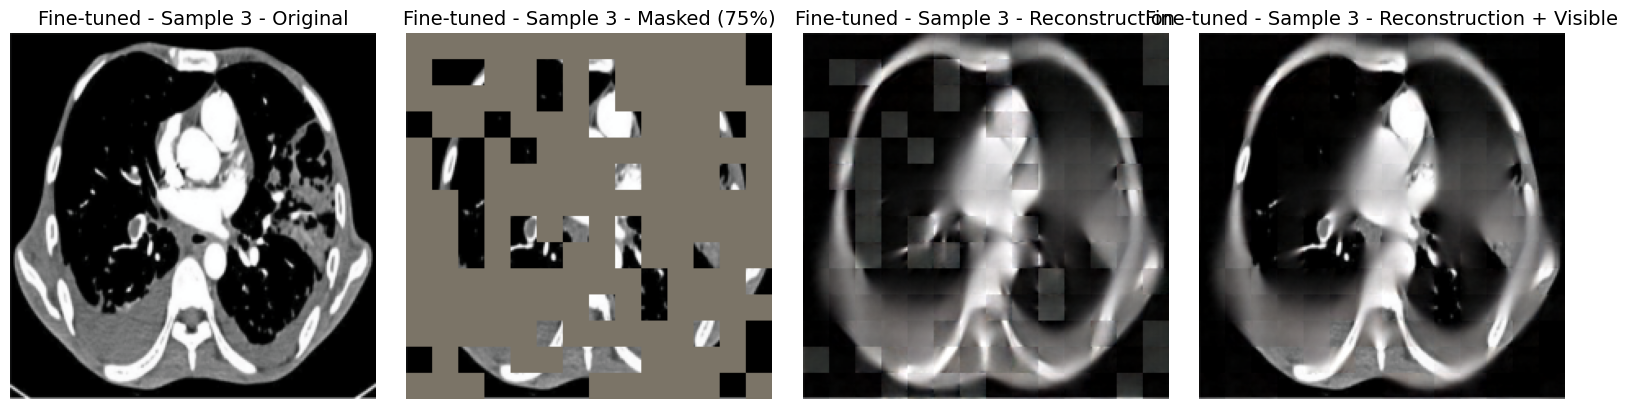


=== Sample 4/5 ===
Image path: /content/ROCOv2-test/test/ROCOv2_2023_test_008166.jpg


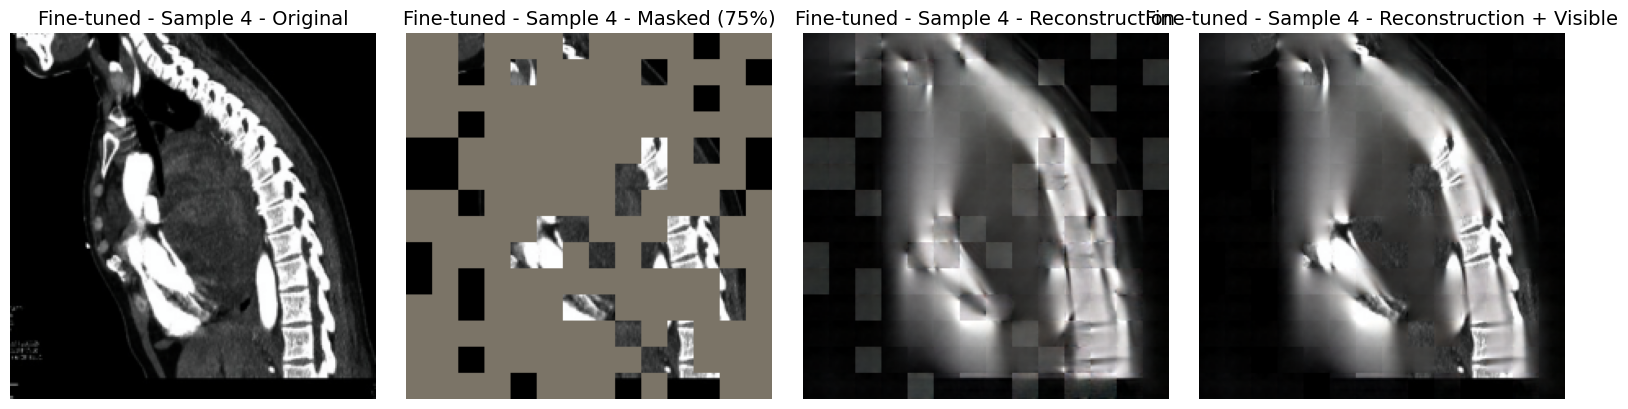


=== Sample 5/5 ===
Image path: /content/ROCOv2-test/test/ROCOv2_2023_test_004895.jpg


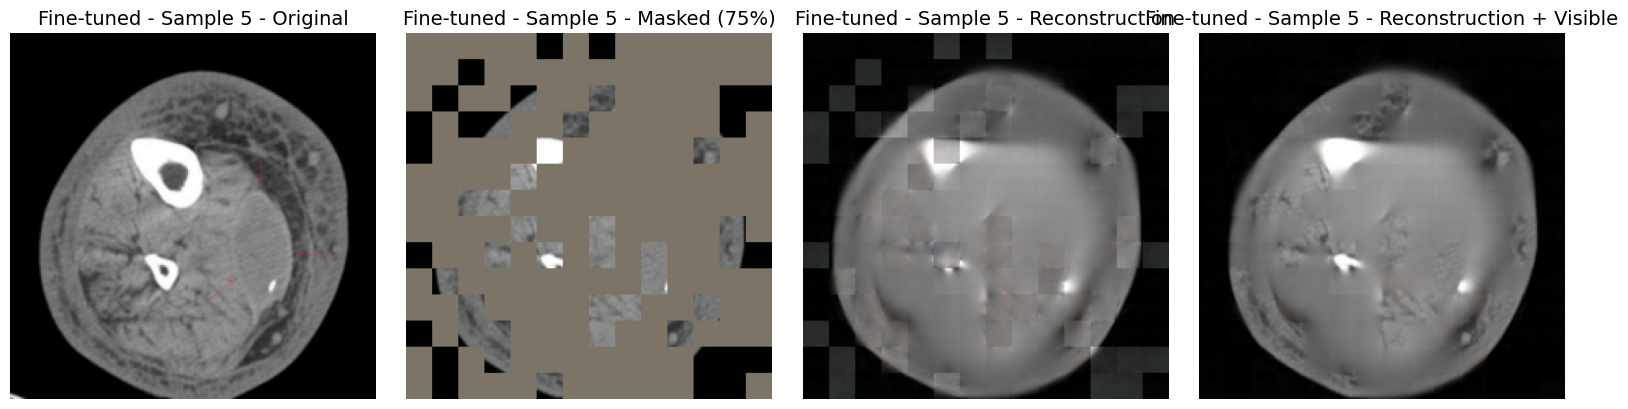


HOMEWORK COMPLETED SUCCESSFULLY!

6. Additional Analysis...
Calculating reconstruction metrics...

Reconstruction Quality Comparison:
Pre-trained Model - MSE: 0.301482 ± 0.156431
Fine-tuned Model  - MSE: 0.282565 ± 0.106977
Improvement: 6.27%

All tasks completed! 🎉
- ✅ Pre-trained model evaluation
- ✅ Model fine-tuning (5 epochs)
- ✅ Fine-tuned model evaluation
- ✅ Model comparison and analysis


In [6]:
# ViT-MAE for Medical Image Reconstruction on ROCOv2 Dataset
# Complete implementation for homework assignment

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import glob
from transformers import ViTMAEForPreTraining, ViTFeatureExtractor
from tqdm import tqdm
import random
from google.colab import drive
import pickle

# Mount Google Drive for model saving/loading
drive.mount('/content/drive')

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

class ROCOv2Dataset(Dataset):
    """Custom dataset for ROCOv2 medical images"""

    def __init__(self, root_dir, feature_extractor, max_samples=None):
        self.root_dir = root_dir
        self.feature_extractor = feature_extractor

        # Get all image files
        image_extensions = ['*.jpg', '*.jpeg', '*.png', '*.bmp', '*.tiff']
        self.image_paths = []

        for ext in image_extensions:
            self.image_paths.extend(glob.glob(os.path.join(root_dir, ext)))
            self.image_paths.extend(glob.glob(os.path.join(root_dir, ext.upper())))

        if max_samples:
            self.image_paths = self.image_paths[:max_samples]

        print(f"Found {len(self.image_paths)} images in {root_dir}")

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]

        try:
            # Load and preprocess image
            image = Image.open(img_path).convert('RGB')

            # Apply feature extraction (resize, normalize)
            pixel_values = self.feature_extractor(image, return_tensors="pt").pixel_values.squeeze(0)

            return {
                'pixel_values': pixel_values,
                'image_path': img_path
            }
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            # Return a random other image if this one fails
            return self.__getitem__((idx + 1) % len(self.image_paths))

def show_image(image, title=''):
    """Display image with proper denormalization"""
    # ImageNet normalization values
    imagenet_mean = np.array([0.485, 0.456, 0.406])
    imagenet_std = np.array([0.229, 0.224, 0.225])

    # image is [H, W, 3]
    assert image.shape[2] == 3
    plt.imshow(torch.clip((image * imagenet_std + imagenet_mean) * 255, 0, 255).int())
    plt.title(title, fontsize=14)
    plt.axis('off')

def visualize_mae_results(pixel_values, model, title_prefix=""):
    """Visualize MAE reconstruction results"""
    model.eval()
    with torch.no_grad():
        # Forward pass
        outputs = model(pixel_values)
        y = model.unpatchify(outputs.logits)
        y = torch.einsum('nchw->nhwc', y).detach().cpu()

        # Visualize the mask
        mask = outputs.mask.detach()
        mask = mask.unsqueeze(-1).repeat(1, 1, model.config.patch_size**2 * 3)
        mask = model.unpatchify(mask)  # 1 is removing, 0 is keeping
        mask = torch.einsum('nchw->nhwc', mask).detach().cpu()

        x = torch.einsum('nchw->nhwc', pixel_values.cpu())

        # Masked image
        im_masked = x * (1 - mask)

        # MAE reconstruction pasted with visible patches
        im_paste = x * (1 - mask) + y * mask

        # Create visualization
        plt.figure(figsize=(16, 4))

        plt.subplot(1, 4, 1)
        show_image(x[0], f"{title_prefix}Original")

        plt.subplot(1, 4, 2)
        show_image(im_masked[0], f"{title_prefix}Masked (75%)")

        plt.subplot(1, 4, 3)
        show_image(y[0], f"{title_prefix}Reconstruction")

        plt.subplot(1, 4, 4)
        show_image(im_paste[0], f"{title_prefix}Reconstruction + Visible")

        plt.tight_layout()
        plt.show()

def evaluate_model_on_samples(model, test_dataset, num_samples=5, title_prefix=""):
    """Evaluate model on random test samples"""
    model.eval()

    # Select random samples
    indices = random.sample(range(len(test_dataset)), min(num_samples, len(test_dataset)))

    for i, idx in enumerate(indices):
        print(f"\n=== Sample {i+1}/{num_samples} ===")
        sample = test_dataset[idx]
        pixel_values = sample['pixel_values'].unsqueeze(0).to(device)

        print(f"Image path: {sample['image_path']}")

        # Set random seed for consistent masking
        torch.manual_seed(i + 42)

        visualize_mae_results(pixel_values, model, f"{title_prefix}Sample {i+1} - ")

def train_mae_model(model, train_loader, num_epochs=5, save_path='/content/drive/MyDrive/vit_mae_medical'):
    """Fine-tune ViT-MAE on medical images"""

    print("Starting fine-tuning...")

    # Set up optimizer
    optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=0.05)

    # Create save directory
    os.makedirs(save_path, exist_ok=True)

    # Training loop
    model.train()
    train_losses = []

    for epoch in range(num_epochs):
        epoch_loss = 0.0
        num_batches = 0

        print(f"\nEpoch {epoch+1}/{num_epochs}")
        progress_bar = tqdm(train_loader, desc=f"Training Epoch {epoch+1}")

        for batch_idx, batch in enumerate(progress_bar):
            pixel_values = batch['pixel_values'].to(device)

            # Forward pass
            optimizer.zero_grad()
            outputs = model(pixel_values)
            loss = outputs.loss

            # Backward pass
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            num_batches += 1

            # Update progress bar
            progress_bar.set_postfix({'Loss': f'{loss.item():.4f}'})

            # Save checkpoint every 100 batches
            if (batch_idx + 1) % 100 == 0:
                checkpoint_path = os.path.join(save_path, f'checkpoint_epoch_{epoch+1}_batch_{batch_idx+1}.pt')
                torch.save({
                    'epoch': epoch,
                    'batch': batch_idx,
                    'model_state_dict': model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'loss': loss.item(),
                }, checkpoint_path)
                print(f"\nCheckpoint saved: {checkpoint_path}")

        avg_epoch_loss = epoch_loss / num_batches
        train_losses.append(avg_epoch_loss)

        print(f"Epoch {epoch+1} Average Loss: {avg_epoch_loss:.4f}")

        # Save model after each epoch
        epoch_save_path = os.path.join(save_path, f'model_epoch_{epoch+1}.pt')
        torch.save({
            'epoch': epoch + 1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'train_losses': train_losses,
        }, epoch_save_path)

        print(f"Model saved: {epoch_save_path}")

    # Save final model
    final_save_path = os.path.join(save_path, 'final_model.pt')
    torch.save({
        'model_state_dict': model.state_dict(),
        'train_losses': train_losses,
        'num_epochs': num_epochs,
    }, final_save_path)

    print(f"\nFinal model saved: {final_save_path}")

    # Plot training loss
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(train_losses) + 1), train_losses, 'b-', linewidth=2)
    plt.title('Training Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Average Loss')
    plt.grid(True)
    plt.show()

    return train_losses

def load_finetuned_model(model, checkpoint_path):
    """Load a fine-tuned model from checkpoint"""
    checkpoint = torch.load(checkpoint_path, map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])
    print(f"Model loaded from: {checkpoint_path}")
    return model

# ================================
# MAIN EXECUTION
# ================================

print("=" * 60)
print("ViT-MAE Medical Image Reconstruction")
print("=" * 60)

# 1. Initialize feature extractor and load pre-trained model
print("\n1. Loading pre-trained ViT-MAE model...")
feature_extractor = ViTFeatureExtractor.from_pretrained("facebook/vit-mae-base")
pretrained_model = ViTMAEForPreTraining.from_pretrained("facebook/vit-mae-base").to(device)

print("Pre-trained model loaded successfully!")

# 2. Create datasets
print("\n2. Creating datasets...")
train_dataset = ROCOv2Dataset(
    root_dir='/content/ROCOv2-train/train',
    feature_extractor=feature_extractor,
    max_samples=2000  # Limit for faster training, remove for full dataset
)

test_dataset = ROCOv2Dataset(
    root_dir='/content/ROCOv2-test/test',
    feature_extractor=feature_extractor,
    max_samples=100   # Limit for faster evaluation
)

# 3. Create data loader for training
train_loader = DataLoader(
    train_dataset,
    batch_size=4,  # Adjust based on GPU memory
    shuffle=True,
    num_workers=2
)

# 4. Evaluate pre-trained model on test samples
print("\n3. Evaluating pre-trained model on test samples...")
print("=" * 40)
evaluate_model_on_samples(pretrained_model, test_dataset, num_samples=5, title_prefix="Pre-trained - ")

# 5. Fine-tune the model
print("\n4. Fine-tuning model on medical images...")
print("=" * 40)

# Create a copy of the model for fine-tuning
finetuned_model = ViTMAEForPreTraining.from_pretrained("facebook/vit-mae-base").to(device)

# Fine-tune the model
train_losses = train_mae_model(
    finetuned_model,
    train_loader,
    num_epochs=5,
    save_path='/content/drive/MyDrive/vit_mae_medical'
)

# 6. Load the fine-tuned model and evaluate
print("\n5. Loading and evaluating fine-tuned model...")
print("=" * 40)

# Load the final fine-tuned model
final_model_path = '/content/drive/MyDrive/vit_mae_medical/final_model.pt'
if os.path.exists(final_model_path):
    finetuned_model = load_finetuned_model(finetuned_model, final_model_path)

    # Evaluate fine-tuned model on test samples
    evaluate_model_on_samples(finetuned_model, test_dataset, num_samples=5, title_prefix="Fine-tuned - ")
else:
    print(f"Fine-tuned model not found at {final_model_path}")
    print("Using the model from the last training iteration...")
    evaluate_model_on_samples(finetuned_model, test_dataset, num_samples=5, title_prefix="Fine-tuned - ")

print("\n" + "=" * 60)
print("HOMEWORK COMPLETED SUCCESSFULLY!")
print("=" * 60)

# 7. Additional Analysis and Comparison
print("\n6. Additional Analysis...")
print("=" * 30)

# Compare reconstruction quality (optional)
def calculate_reconstruction_metrics(model, test_dataset, num_samples=20):
    """Calculate reconstruction metrics"""
    model.eval()
    mse_losses = []

    indices = random.sample(range(len(test_dataset)), min(num_samples, len(test_dataset)))

    with torch.no_grad():
        for idx in indices:
            sample = test_dataset[idx]
            pixel_values = sample['pixel_values'].unsqueeze(0).to(device)

            outputs = model(pixel_values)
            reconstructed = model.unpatchify(outputs.logits)

            # Calculate MSE between original and reconstructed
            mse = nn.MSELoss()(reconstructed, pixel_values)
            mse_losses.append(mse.item())

    return np.mean(mse_losses), np.std(mse_losses)

# Calculate metrics for both models
print("Calculating reconstruction metrics...")
pretrained_mse_mean, pretrained_mse_std = calculate_reconstruction_metrics(pretrained_model, test_dataset)
finetuned_mse_mean, finetuned_mse_std = calculate_reconstruction_metrics(finetuned_model, test_dataset)

print(f"\nReconstruction Quality Comparison:")
print(f"Pre-trained Model - MSE: {pretrained_mse_mean:.6f} ± {pretrained_mse_std:.6f}")
print(f"Fine-tuned Model  - MSE: {finetuned_mse_mean:.6f} ± {finetuned_mse_std:.6f}")

improvement = ((pretrained_mse_mean - finetuned_mse_mean) / pretrained_mse_mean) * 100
print(f"Improvement: {improvement:.2f}%")

print("\nAll tasks completed! 🎉")
print("- ✅ Pre-trained model evaluation")
print("- ✅ Model fine-tuning (5 epochs)")
print("- ✅ Fine-tuned model evaluation")
print("- ✅ Model comparison and analysis")